### Week3

https://discourse.onlinedegree.iitm.ac.in/t/lec-3-4-overfitting/28384

-- @ShreyanshBardia

In [1]:
import matplotlib.pyplot as plt
import itertools
import functools
import numpy as np

def polynomialtransformation(x,degree):
    x=np.array(x) if x.ndim!=1 else np.array(x).reshape(-1,1)
    x_t=x.T
    features=[np.ones(x.shape[0])]
    for d in range(1,degree+1):
      f=itertools.combinations_with_replacement(x_t,d)
      for it in f:  
        features.append(functools.reduce(lambda x,y:x*y,it))
    return np.array(features).T
def gd(x,y,lr,num_of_iter):
  w=np.zeros(x.shape[-1])
  for _ in range(num_of_iter):
    w=w-lr*x.T@(x@w-y)
  return w
def fit(x,y):
  return np.linalg.pinv(x) @ y
def visualize(x,y,w):
  plt.scatter(x,y)
  x_ax=np.linspace(0,1,100)
  plt.plot(x_ax,np.sin(2*np.pi*x_ax),label="sin()")
  plt.plot(x_ax,polynomialtransformation(x_ax,9)@w,label="fit")
  plt.legend()
  plt.show()

x=np.linspace(0,1,10)
y=np.sin(2*np.pi*x)+np.random.normal(scale=0.2,size=10)

w=gd(polynomialtransformation(x,9),y,0.01,100000)
visualize(x,y,w)

<Figure size 640x480 with 1 Axes>

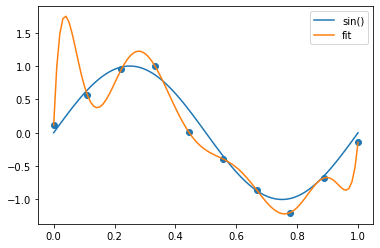

In [2]:
w=fit(polynomialtransformation(x,9),y)
visualize(x,y,w)

https://discourse.onlinedegree.iitm.ac.in/t/doubt-in-l-3-4-polynomial-regression-an-example/28435/3

-- @rohitkumar @Anand

(0.0, 1.0)

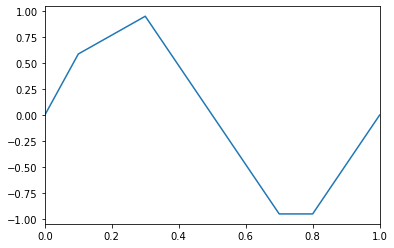

In [3]:
import numpy as np
from matplotlib import pyplot as plt
x = np.array(sorted([0.7,0.3,0,0.1,0.8,1]))
#x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)
plt.plot(x, y)
plt.xlim(0, 1)

### Week4

https://discourse.onlinedegree.iitm.ac.in/t/week-4-lec-4-4-time-6-50/28700

-- @mukeshonlines

In [4]:
def encode(class_indices: np.ndarray):
  # get the max value from the given array
  maxval =  np.max(class_indices)+1
  
  encode_list = []
  for i in class_indices:
    # create the list with 0 with max val like if max is 4  [0,0,0,0]
    zero_list = [0] * maxval
    # update the index value to 1 for exmaple if value is 2  [0,0,2,0] and if 1  [0,1,0,0]
    zero_list[i]=1
    # append the list to encode list
    encode_list.append(zero_list)
  return np.array(encode_list)  

class_indices = np.array([1,0,1,2,7])
encode(np.array(class_indices))

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

Below code is equivalent to the above.

In [5]:
import numpy as np
class_indices = np.array([1,0,1,2,7]) #using same example that mukesh used
np.eye(np.max(class_indices) + 1)[class_indices]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])